In [34]:
import numpy as np
import pandas as pd
import seaborn as sns

In [45]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [35]:
df = pd.read_csv("dataset.csv")
df.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [36]:
df.shape

(13611, 17)

In [37]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

<Axes: >

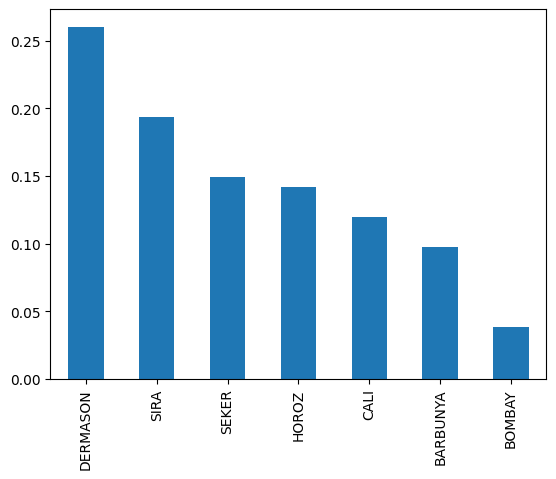

In [38]:
df.Class.value_counts(normalize=True).plot(kind='bar')

In [19]:
print("mean Area of a Bean : ",df.Area.mean())
print("mean Perimeter of a Bean : ",df.Perimeter.mean())

mean Area of a Bean :  53048.284549261625
mean Perimeter of a Bean :  855.283458599662


C:\Users\asus\AppData\Local\Temp\ipykernel_18664\1744796369.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

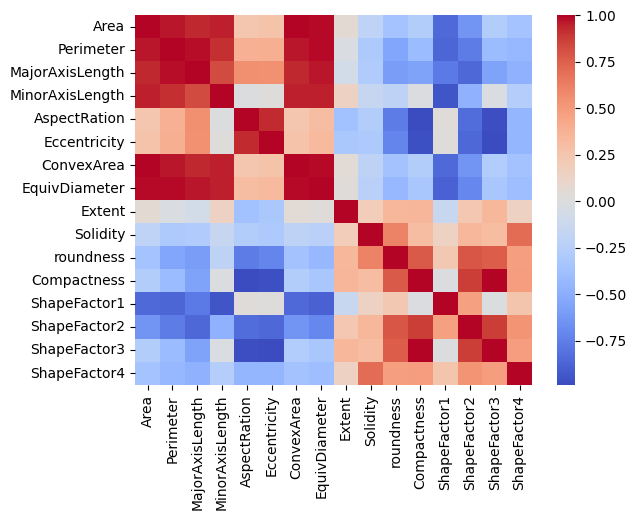

In [33]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,cmap='coolwarm')

In [47]:
max_acc = 0
acc_list = []
param_list = []
for i in range(10):
    sample_df = df.sample(frac=0.40, replace=False)
    x_train, x_test, y_train, y_test = train_test_split(sample_df.drop('Class', axis=1), sample_df.Class, test_size=0.3, random_state=42, stratify=sample_df.Class)
    # x_train = StandardScaler().fit_transform(x_train)
    param_grid = { 
                'C':[0.1, 0.5, 1, 2, 3],
                'kernel':['rbf', 'poly', 'sigmoid', 'linear'],
                'degree':[1, 2, 3, 4],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
                }
    
    grid = GridSearchCV(SVC(max_iter=100), param_grid)
    grid.fit(x_train, y_train)  
    y_pred = grid.predict(x_test)
    print(grid.best_params_)
    print('Sample {}'.format(i+1))
    print('Accuracy: {}\n'.format(accuracy_score(y_test, y_pred))) 
    
    acc_list.append(accuracy_score(y_test, y_pred))
    param_list.append(grid.best_params_)
    
    if accuracy_score(y_test, y_pred) > max_acc:
        max_acc = accuracy_score(y_test, y_pred)
        best_params = grid.best_params_
        best_model = grid.best_estimator_
        best_sample_df = sample_df

{'C': 3, 'degree': 1, 'gamma': 0.001, 'kernel': 'poly'}
Sample 1
Accuracy: 0.26499388004895963

{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}
Sample 2
Accuracy: 0.26621787025703797

{'C': 1, 'degree': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
Sample 3
Accuracy: 0.5177478580171359

{'C': 0.5, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Sample 4
Accuracy: 0.33108935128518974

{'C': 3, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}
Sample 5
Accuracy: 0.518359853121175

{'C': 0.1, 'degree': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
Sample 6
Accuracy: 0.5116279069767442

{'C': 0.1, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Sample 7
Accuracy: 0.47980416156670747

{'C': 2, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}
Sample 8
Accuracy: 0.25458996328029376

{'C': 0.5, 'degree': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
Sample 9
Accuracy: 0.5006119951040392

{'C': 0.5, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}
Sample 10
Accuracy: 0.3353733170134639



In [48]:
print(acc_list)
print(param_list)

[0.26499388004895963, 0.26621787025703797, 0.5177478580171359, 0.33108935128518974, 0.518359853121175, 0.5116279069767442, 0.47980416156670747, 0.25458996328029376, 0.5006119951040392, 0.3353733170134639]
[{'C': 3, 'degree': 1, 'gamma': 0.001, 'kernel': 'poly'}, {'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}, {'C': 1, 'degree': 1, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 0.5, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}, {'C': 3, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}, {'C': 0.1, 'degree': 1, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 0.1, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}, {'C': 2, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}, {'C': 0.5, 'degree': 1, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 0.5, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}]


In [49]:
final_df = pd.DataFrame(data=[acc_list, param_list], index=['Accuracy', 'Parameters']).T
final_df

,Accuracy,Parameters
0,0.264994,"{'C': 3, 'degree': 1, 'gamma': 0.001, 'kernel'..."
1,0.266218,"{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
2,0.517748,"{'C': 1, 'degree': 1, 'gamma': 0.0001, 'kernel..."
3,0.331089,"{'C': 0.5, 'degree': 1, 'gamma': 0.001, 'kerne..."
4,0.51836,"{'C': 3, 'degree': 1, 'gamma': 0.01, 'kernel':..."
5,0.511628,"{'C': 0.1, 'degree': 1, 'gamma': 0.0001, 'kern..."
6,0.479804,"{'C': 0.1, 'degree': 1, 'gamma': 0.001, 'kerne..."
7,0.25459,"{'C': 2, 'degree': 1, 'gamma': 0.01, 'kernel':..."
8,0.500612,"{'C': 0.5, 'degree': 1, 'gamma': 0.0001, 'kern..."
9,0.335373,"{'C': 0.5, 'degree': 1, 'gamma': 0.01, 'kernel..."


In [50]:
print(max_acc)
print(best_params)
print(best_model)
best_sample_df.head()

0.518359853121175
{'C': 3, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}
SVC(C=3, degree=1, gamma=0.01, kernel='poly', max_iter=100)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
10340,25601,579.206,206.351775,158.238735,1.304053,0.641839,25898,180.544193,0.757426,0.988532,0.958960,0.874934,0.008060,0.002914,0.765510,0.998265,DERMASON
12887,36411,717.877,273.481753,169.971328,1.608988,0.783407,36843,215.313551,0.749290,0.988275,0.887856,0.787305,0.007511,0.001780,0.619849,0.997330,DERMASON
9152,46411,807.342,307.584525,192.419462,1.598510,0.780158,46925,243.089121,0.793350,0.989046,0.894779,0.790316,0.006627,0.001595,0.624600,0.998430,SIRA
62,32518,655.131,220.821199,187.665586,1.176674,0.527020,32842,203.477772,0.794032,0.990135,0.952089,0.921459,0.006791,0.003020,0.849087,0.999099,SEKER
8391,42989,786.826,287.248274,191.264908,1.501835,0.746084,43594,233.955754,0.719698,0.986122,0.872589,0.814472,0.006682,0.001814,0.663365,0.996265,SIRA


In [54]:
iterations = list()
acc_list = list()
x_train, x_test, y_train, y_test = train_test_split(best_sample_df.drop('Class', axis=1), best_sample_df.Class, test_size=0.3, random_state=42, stratify=best_sample_df.Class)
x_train = StandardScaler().fit_transform(x_train)

for i in range(100):
    x = i+1
    svm = SVC(C=2, degree=1, gamma=0.1, kernel='rbf', max_iter=x)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)
    iterations.append(x)

In [55]:
iterations = np.array(iterations)
acc_list = np.array(acc_list)

In [56]:
print(iterations.shape)
print(acc_list.shape)

(100,)
(100,)


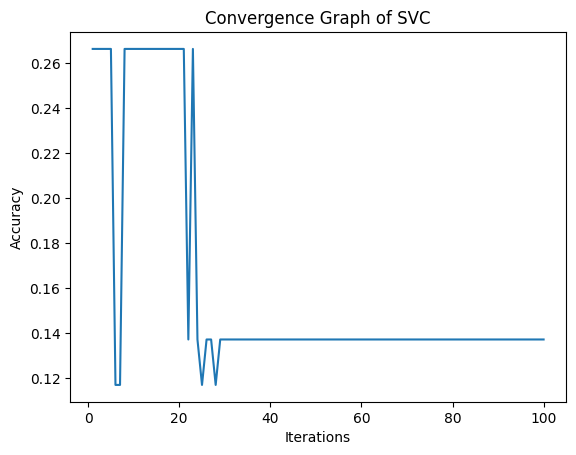

In [58]:
plt.plot(iterations, acc_list)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph of SVC')
plt.show()